In [7]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Function to generate the time series problem
def f_y(n):
    return np.sqrt(1+ np.sin(n + np.sin(n)**2))

#Function to change the input values to make this model work with high accuracy.
#The input values should be changed to a regular interval frequency.
def f_x(n):
    return np.sin(n)

plt.rcParams["figure.figsize"] = [12,7]

In [9]:
i = np.arange(0,15,0.001)
i = i.reshape(-1, 1)
x = f_x(i)

## Creating the model

In [10]:
# Aqui diversas combinações de parametros foram testadas, essas foram as que melhor performaram.

mlp = MLPRegressor(hidden_layer_sizes=(100,100), 
                activation='tanh', 
                random_state=42,
                learning_rate = 'adaptive',
                solver='lbfgs')


## Trainning and Test

In [11]:
mlp.fit(x, f_y(x).ravel())

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

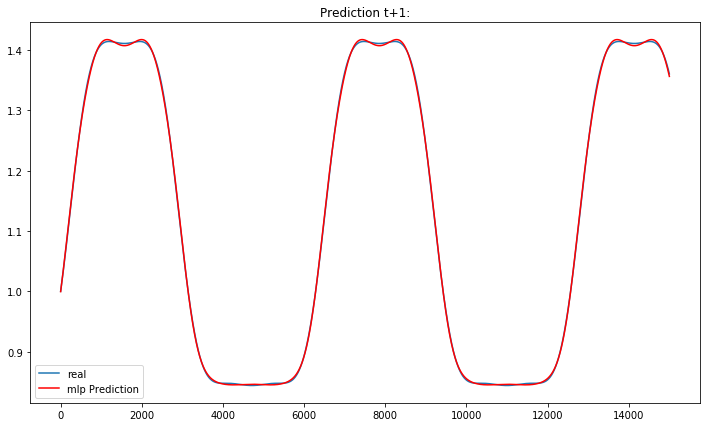

mean_absolute:  0.002000235105753435
mean_squared:  5.3113104528269164e-06
r2_score:  0.9999104969432628


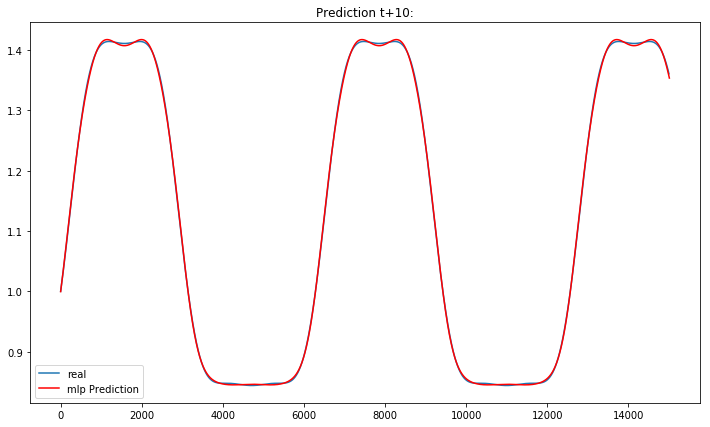

mean_absolute:  0.002001491039465252
mean_squared:  5.318180479834498e-06
r2_score:  0.9999103747254517


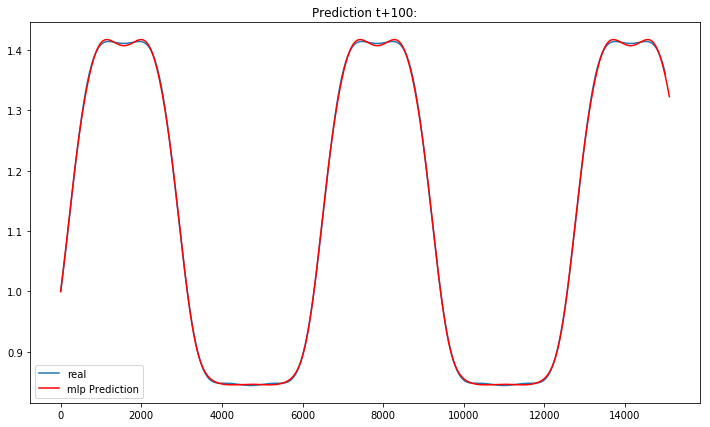

mean_absolute:  0.002015853885121459
mean_squared:  5.402515427955853e-06
r2_score:  0.999908821638535


In [12]:
#Prediction t+1
ii = np.arange(0,15.001,0.001)
ii = ii.reshape(-1, 1)
test_x = f_x(ii)
y_pred = mlp.predict(test_x)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(f_y(x), label='real')
ax1.plot(y_pred, c='r', label='mlp Prediction')

plt.legend()
plt.title('Prediction t+1:')
plt.show()

print('mean_absolute: ', mean_absolute_error(f_y(test_x).ravel(), y_pred))
print('mean_squared: ', mean_squared_error(f_y(test_x).ravel(), y_pred))
print('r2_score: ', r2_score(f_y(test_x).ravel(), y_pred))

#Prediction t+10
ii = np.arange(0,15.01,0.001)
ii = ii.reshape(-1, 1)
test_x = f_x(ii)
y_pred = mlp.predict(test_x)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(f_y(x), label='real')
ax1.plot(y_pred, c='r', label='mlp Prediction')

plt.legend()
plt.title('Prediction t+10:')
plt.show()

print('mean_absolute: ', mean_absolute_error(f_y(test_x).ravel(), y_pred))
print('mean_squared: ', mean_squared_error(f_y(test_x).ravel(), y_pred))
print('r2_score: ', r2_score(f_y(test_x).ravel(), y_pred))

#Prediction t+100
ii = np.arange(0,15.1,0.001)
ii = ii.reshape(-1, 1)
test_x = f_x(ii)
y_pred = mlp.predict(test_x)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(f_y(x), label='real')
ax1.plot(y_pred, c='r', label='mlp Prediction')

plt.legend()
plt.title('Prediction t+100:')
plt.show()

print('mean_absolute: ', mean_absolute_error(f_y(test_x).ravel(), y_pred))
print('mean_squared: ', mean_squared_error(f_y(test_x).ravel(), y_pred))
print('r2_score: ', r2_score(f_y(test_x).ravel(), y_pred))

## Conclusion: This kind of time series can have a better performance when we change the input values to be a regular pattern. This way the model will only work with known values and will perform fine to predict the next values.